<a href="https://colab.research.google.com/github/mastermindankur/stock-analysis/blob/main/Delivery_Margin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bsedata
!pip install quandl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import quandl
import requests
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# to be ale to view numbers in human readable format 2.058691e+08
pd.set_option('display.float_format', lambda x: '%.3f' % x)
quandl.ApiConfig.api_key = 'izbxGLp_K_zzzUJdN9sp'

In [5]:
url = 'https://www.bseindia.com/markets/equity/EQReports/TopMarketCapitalization.aspx'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
dfs = pd.read_html(r.text)
bse100= dfs[0].iloc[0:100]
bse100['Code']='BSE/BOM'+ bse100['Security Code']


In [6]:
bse100

,Security Code,Security Name,Close(),Market Capitalization( Cr.),Code
0,500325,RELIANCE INDUSTRIES LTD.,2482.950,1574052.030,BSE/BOM500325
1,532540,TATA CONSULTANCY SERVICES LTD.,3871.300,1432013.760,BSE/BOM532540
2,500180,HDFC Bank Ltd,1601.350,886739.860,BSE/BOM500180
3,500209,INFOSYS LTD.,1763.450,748032.170,BSE/BOM500209
4,500696,HINDUSTAN UNILEVER LTD.,2741.750,644199.180,BSE/BOM500696
...,...,...,...,...,...
95,523642,PI Industries Ltd,3213.400,48753.100,BSE/BOM523642
96,539523,Alkem Laboratories Ltd,4001.850,47848.120,BSE/BOM539523
97,543287,Macrotech Developers Ltd,1064.550,47619.270,BSE/BOM543287
98,511243,Cholamandalam Investment and Finance Company Ltd,575.800,47252.940,BSE/BOM511243


In [52]:
sbi =quandl.get('BSE/BOM500209', start_date='2021-06-01', end_date='2021-06-30')

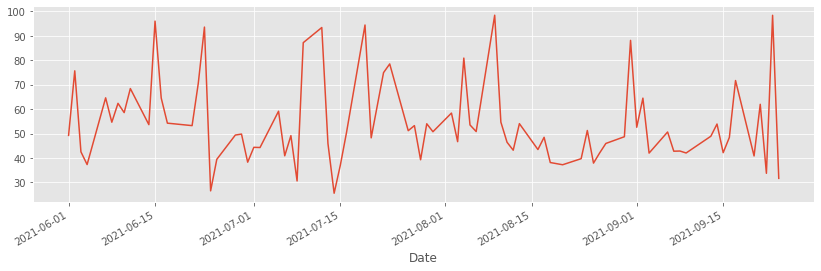

In [41]:
sbi['% Deli. Qty to Traded Qty'].plot(figsize=(14,4))

In [53]:
sbi['normalized']=sbi['Open']/16

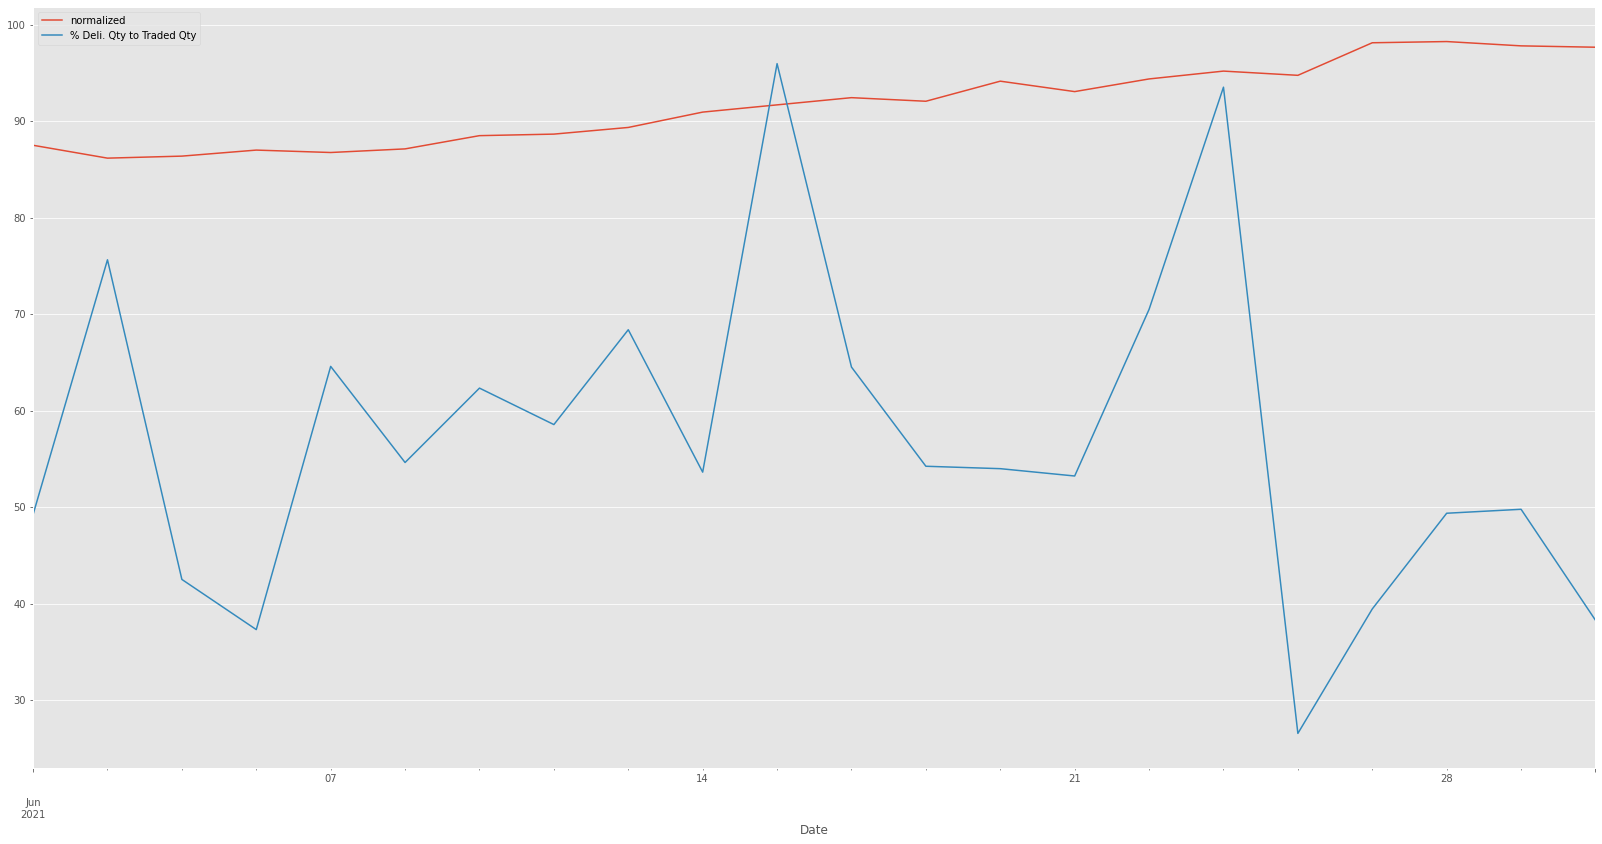

In [54]:
sbi[['normalized','% Deli. Qty to Traded Qty']].plot(figsize=(28,14))

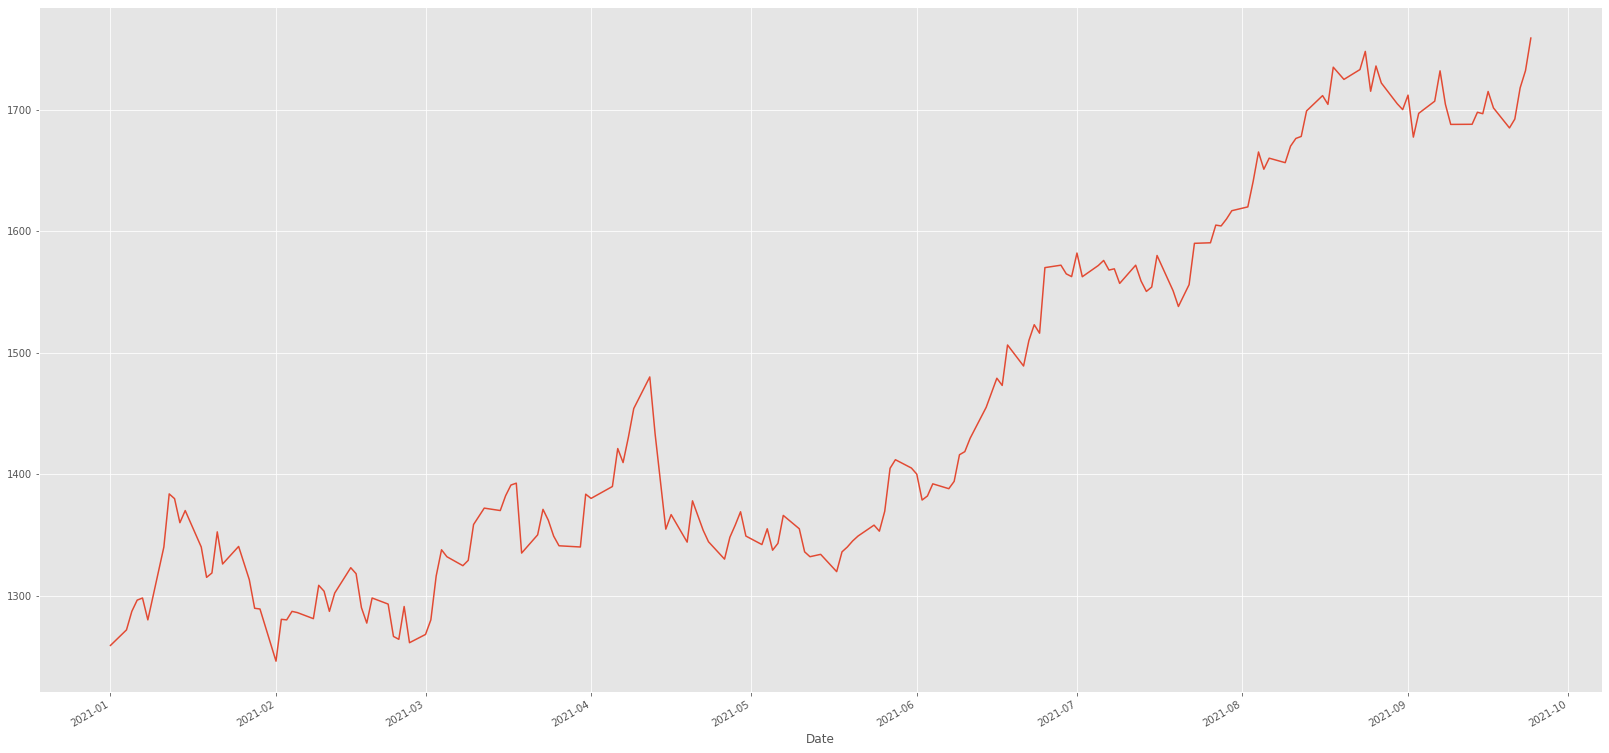

In [34]:
sbi['Open'].plot(figsize=(28,14))

In [37]:
sbi.to_excel('data-dump-stock.xlsx',sheet_name='Sheet1')